In [1]:
%% Machine Learning Online Class
%  Exercise 5 | Regularized Linear Regression and Bias-Variance
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     linearRegCostFunction.m
%     learningCurve.m
%     validationCurve.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

Loading and Visualizing Data ...


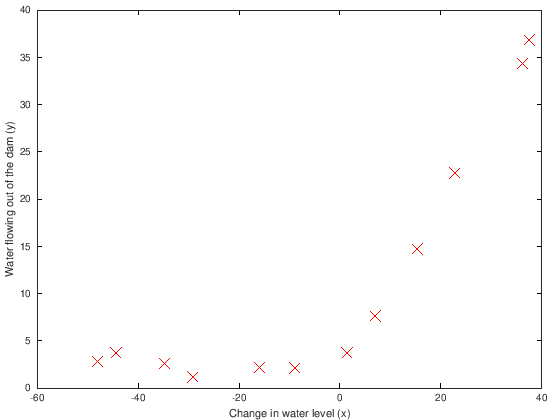

In [2]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

In [3]:
%% =========== Part 2: Regularized Linear Regression Cost =============
%  You should now implement the cost function for regularized linear 
%  regression. 
%

theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


In [4]:
%% =========== Part 3: Regularized Linear Regression Gradient =============
%  You should now implement the gradient for regularized linear 
%  regression.
%

theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


Iteration     2 | Cost: 2.237391e+01


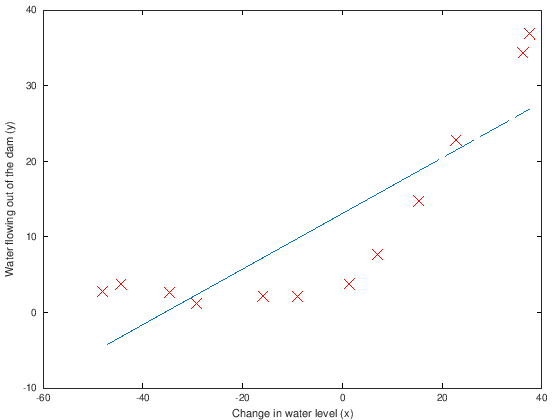

In [5]:
%% =========== Part 4: Train Linear Regression =============
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fmincg at line 124 column 8
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
    fminc

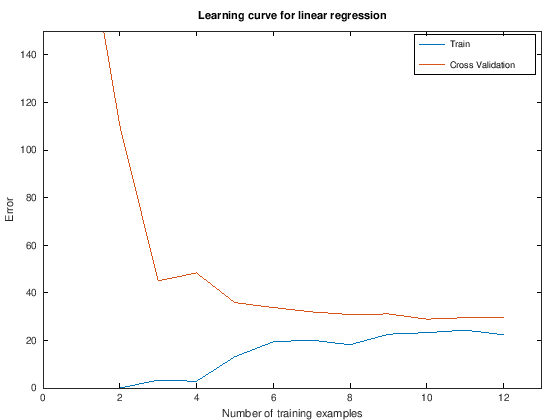

In [6]:
%% =========== Part 5: Learning Curve for Linear Regression =============
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- Figure 3 in ex5.pdf 
%

lambda = 0;
[error_train, error_val] = ...
    learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

% "division by zero" warnings can be safely ignored

In [7]:
%% =========== Part 6: Feature Mapping for Polynomial Regression =============
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


Iteration    61 | Cost: 7.268148e+00
Iteration     9 | Cost: 1.058041e-31
Iteration    20 | Cost: 7.269436e-02
Iteration    28 | Cost: 1.849879e+01
Iteration    44 | Cost: 1.457586e+01
Iteration    44 | Cost: 1.166072e+01
Iteration    62 | Cost: 1.011882e+01
Iteration    55 | Cost: 9.416317e+00
Iteration    57 | Cost: 8.256224e+00
    fmincg at line 102 column 12
    trainLinearReg at line 19 column 7
    learningCurve at line 57 column 11
Iteration    69 | Cost: 7.802076e+00
Iteration    66 | Cost: 7.064398e+00
Iteration    70 | Cost: 6.423784e+00
Iteration    61 | Cost: 7.268148e+00
Polynomial Regression (lambda = 1.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.045772	143.522890
  	3		2.911375	5.534713
  	4		1.499412	6.609883
  	5		1.199183	6.634076
  	6		0.924511	8.291979
  	7		1.540897	5.737166
  	8		1.422968	5.516444
  	9		1.553733	6.239740
  	10		1.441565	5.983046
  	11		1.308147	6.043752
  	12		2.076188	4.260626


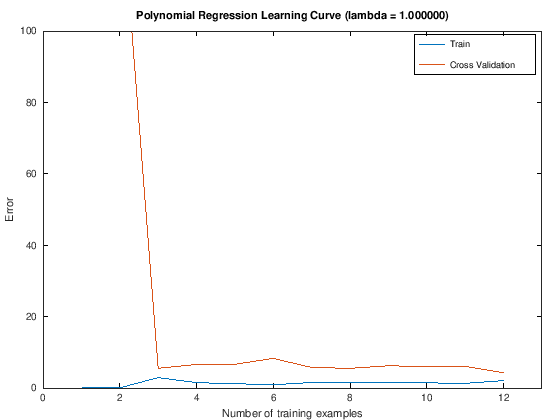

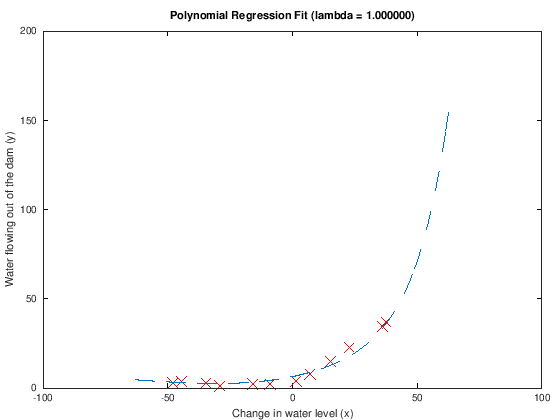

In [8]:
%% =========== Part 7: Learning Curve for Polynomial Regression =============
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

lambda = 1;
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

lambda = 0
Iteration   200 | Cost: 1.046742e-01
lambda =  0.0010000
Iteration   200 | Cost: 1.790136e-01
lambda =  0.0030000
Iteration   200 | Cost: 2.517690e-01
lambda =  0.010000
Iteration   200 | Cost: 3.850633e-01
lambda =  0.030000
Iteration   200 | Cost: 6.692749e-01
lambda =  0.10000
Iteration   178 | Cost: 1.443470e+00
lambda =  0.30000
Iteration   102 | Cost: 3.101591e+00
lambda =  1
Iteration    61 | Cost: 7.268148e+00
lambda =  3
Iteration    36 | Cost: 1.586769e+01
lambda =  10
Iteration    19 | Cost: 3.337220e+01
lambda		Train Error	Validation Error
 0.000000	0.104674	9.621997
 0.001000	0.131455	14.423586
 0.003000	0.183597	18.575657
 0.010000	0.221578	16.978888
 0.030000	0.281851	12.829316
 0.100000	0.459318	7.587014
 0.300000	0.921759	4.636833
 1.000000	2.076188	4.260626
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945509


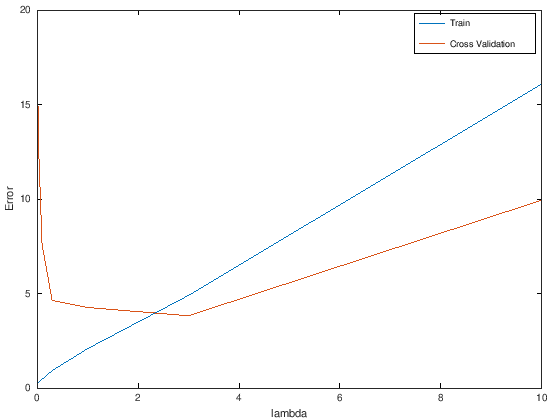

In [9]:
%% =========== Part 8: Validation for Selecting Lambda =============
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
    fprintf(' %f\t%f\t%f\n', lambda_vec(i), error_train(i), error_val(i));
end

In [10]:
% Evaluate test set error
lambda = 3;
theta = trainLinearReg(X_poly, y, lambda);
cost = linearRegCostFunction(X_poly_test, ytest, theta, 0);
fprintf('Test set error: %f\n\n', cost);

Iteration    36 | Cost: 1.586769e+01
Test set error: 3.859888



In [11]:
submit

== Submitting solutions | Regularized Linear Regression and Bias/Variance...


Use token from last successful submission (callisto@praseodym.net)? (Y/n): y


Iteration    14 | Cost: 2.436413e-33
Iteration    15 | Cost: 1.655087e-01
Iteration     9 | Cost: 1.608881e-01
Iteration    16 | Cost: 2.461099e-01
Iteration    10 | Cost: 2.012938e-01
Iteration    10 | Cost: 1.752179e-01
Iteration     8 | Cost: 1.538717e-01
Iteration    10 | Cost: 1.360020e-01
Iteration    11 | Cost: 1.253141e-01
Iteration    11 | Cost: 1.155151e-01
lambda = 0
Iteration    12 | Cost: 1.151643e-01
lambda =  0.0010000
Iteration     9 | Cost: 1.151647e-01
lambda =  0.0030000
Iteration    11 | Cost: 1.151656e-01
lambda =  0.010000
Iteration     6 | Cost: 1.151685e-01
lambda =  0.030000
Iteration     6 | Cost: 1.151769e-01
lambda =  0.10000
Iteration    10 | Cost: 1.152058e-01
lambda =  0.30000
Iteration     6 | Cost: 1.152840e-01
lambda =  1
Iteration    11 | Cost: 1.155151e-01
lambda =  3
Iteration    11 | Cost: 1.159475e-01
lambda =  10
Iteration    14 | Cost: 1.165421e-01
== 
==                                   Part Name |     Score | Feedback
==                      